In [1]:
#Import necessary Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
# Assume the dataset is available as 'influencers.csv'
df = pd.read_csv("/content/Influencer.csv")


In [3]:
# Display the first few rows of the dataset to understand its structure
print(df.head())


   Rank   Channel Info  Influence Score Followers Avg. Likes Posts  \
0     1    \ncristiano               92    485.2m       8.7m  3.4k   
1     2    kyliejenner               91    370.7m       8.2m  7.0k   
2     3     \nleomessi               90    363.9m       6.7m   915   
3     4  \nselenagomez               93    348.8m       6.1m  1.9k   
4     5      \ntherock               91    339.4m       1.8m  6.8k   

   60-Day Eng Rate New Post Avg. Likes Total Likes Country Or Region  
0            0.013                6.3m       29.1b             Spain  
1            0.014                5.0m       57.4b     United States  
2            0.010                3.5m        6.1b               NaN  
3            0.005                1.7m       11.4b     United States  
4            0.003              932.0k       12.6b     United States  


In [4]:
# Check for missing values
print(df.isnull().sum())


Rank                    0
Channel Info            0
Influence Score         0
Followers               0
Avg. Likes              0
Posts                   0
60-Day Eng Rate         0
New Post Avg. Likes     0
Total Likes             0
Country Or Region      63
dtype: int64


In [43]:
# Step 2: Correlation Analysis
correlation_matrix = df.corr()

# Find the most highly correlated features (excluding self-correlation)
corr_pairs = correlation_matrix.unstack()
corr_pairs = corr_pairs[corr_pairs.index.get_level_values(0) != corr_pairs.index.get_level_values(1)]
highest_corr_pair = corr_pairs.idxmax()
highest_corr_value = corr_pairs.max()

print(f"Most highly correlated pair: {highest_corr_pair} with correlation coefficient: {highest_corr_value}")


Most highly correlated pair: ('Influence Score', 'Posts') with correlation coefficient: 0.06832279412226913


In [47]:
df = pd.read_csv("/content/Influencer.csv")

In [48]:
print(df.columns)

Index(['Rank', 'Channel Info', 'Influence Score', 'Followers', 'Avg. Likes',
       'Posts', '60-Day Eng Rate', 'New Post Avg. Likes', 'Total Likes',
       'Country Or Region'],
      dtype='object')


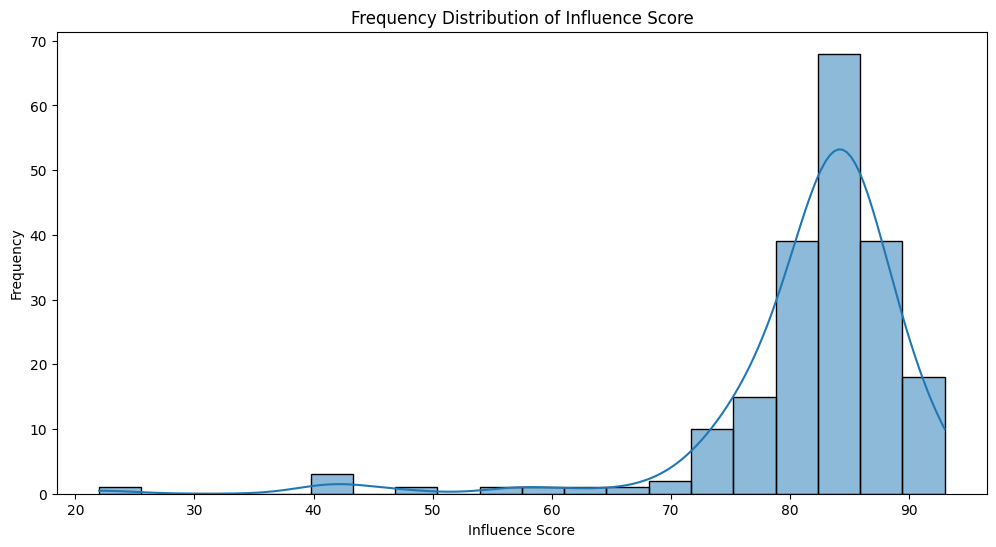

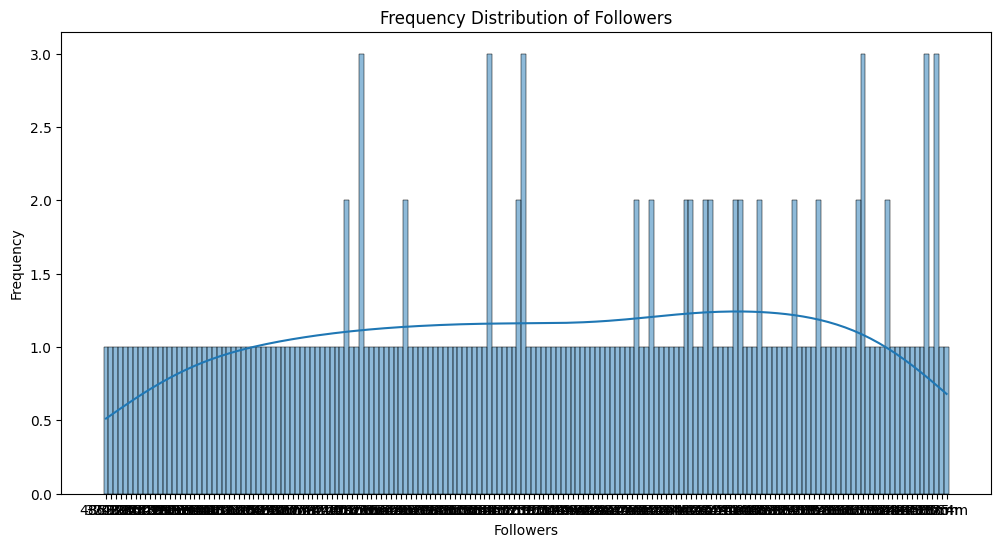

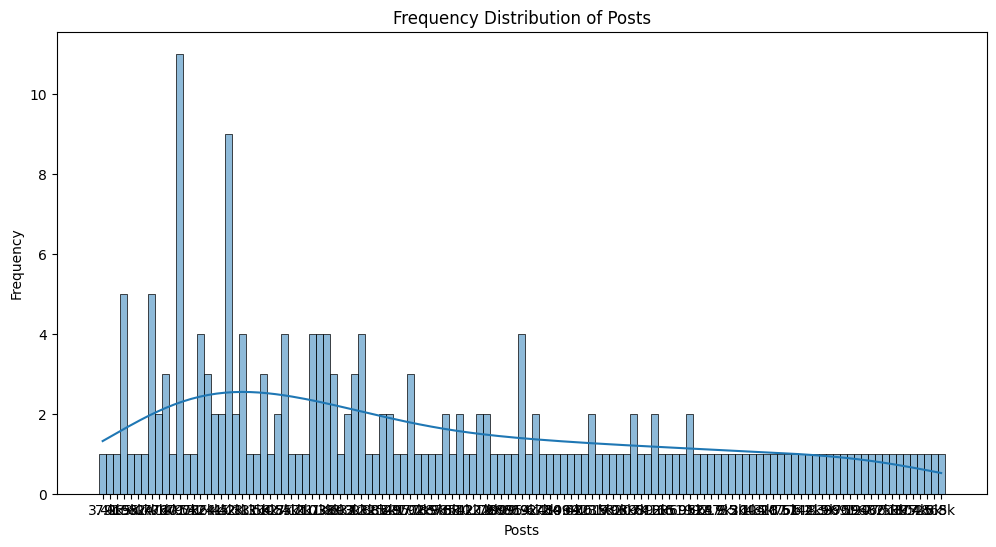

In [53]:
# Step 3: Frequency Distribution

# Influence Score
plt.figure(figsize=(12, 6))
# Replace 'influence_score' with the actual column name if it's different, for example 'Influence_Score'
sns.histplot(df['Influence Score'], bins=20, kde=True)
plt.title('Frequency Distribution of Influence Score')
plt.xlabel('Influence Score')
plt.ylabel('Frequency')
plt.show()

# Followers
plt.figure(figsize=(12, 6))
sns.histplot(df['Followers'], bins=20, kde=True)
plt.title('Frequency Distribution of Followers')
plt.xlabel('Followers')
plt.ylabel('Frequency')
plt.show()

# Posts
plt.figure(figsize=(12, 6))
sns.histplot(df['Posts'], bins=20, kde=True)
plt.title('Frequency Distribution of Posts')
plt.xlabel('Posts')
plt.ylabel('Frequency')
plt.show()


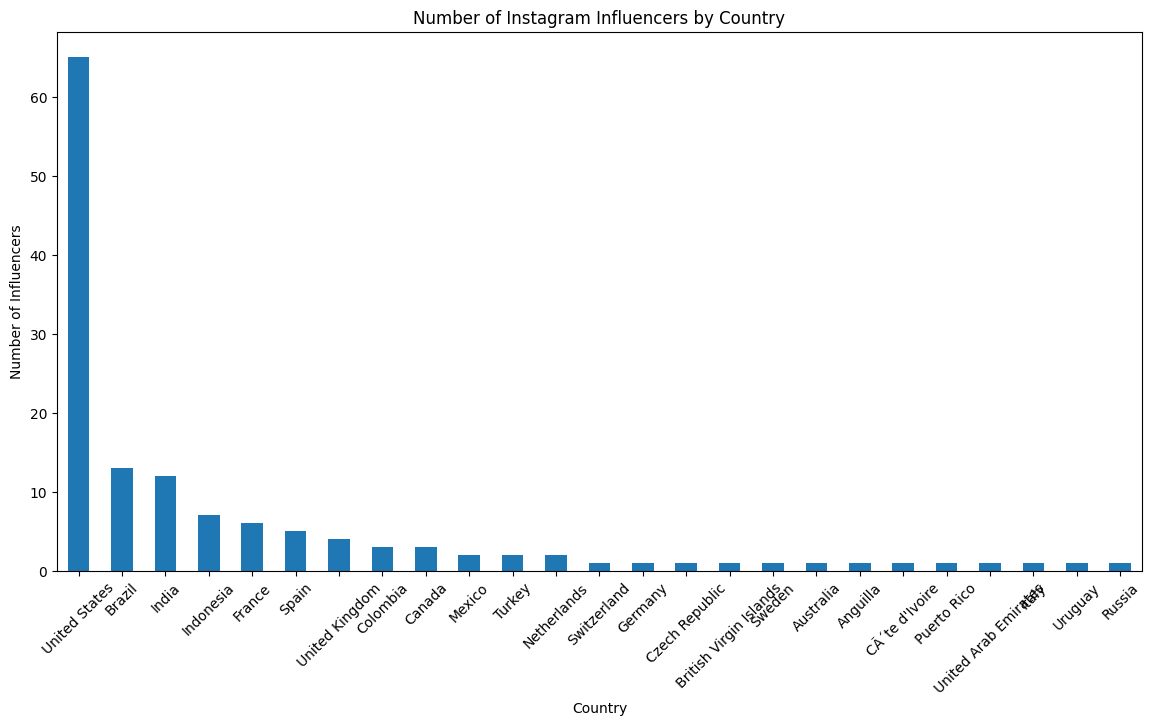

In [56]:
# Step 4: Count of Instagram Influencers by Country
country_counts = df['Country Or Region'].value_counts()

# Plotting the barchart
plt.figure(figsize=(14, 7))
country_counts.plot(kind='bar')
plt.title('Number of Instagram Influencers by Country')
plt.xlabel('Country')
plt.ylabel('Number of Influencers')
plt.xticks(rotation=45)
plt.show()

In [65]:
# Step 5: Top 10 Influencers

# By Followers
# Convert 'Followers' column to numeric type before using nlargest
df['Followers'] = pd.to_numeric(df['Followers'], errors='coerce')  # 'coerce' handles non-numeric values by setting them to NaN
top_Followers = df.nlargest(10, 'Followers')[['Channel Info', 'Followers']]
print("Top 10 Influencers by Followers:\n", top_Followers)

# By Average Likes
# Convert 'Avg. Likes' column to numeric type before using nlargest
df['Avg. Likes'] = pd.to_numeric(df['Avg. Likes'], errors='coerce')  # Convert to numeric, handling errors
top_avg_likes = df.nlargest(10, 'Avg. Likes')[['Channel Info', 'Avg. Likes']]  # Use 'Channel Info' instead of 'Channel_Info'
print("\nTop 10 Influencers by Average Likes:\n", top_avg_likes)

# By Total Likes
# Convert 'total_likes' column to numeric type before using nlargest
df['Total Likes'] = pd.to_numeric(df['Total Likes'], errors='coerce')  # Convert to numeric, handling errors
top_total_likes = df.nlargest(10, 'Total Likes')[['Channel Info', 'Total Likes']]  # Use 'Channel Info' instead of 'channel_info'
print("\nTop 10 Influencers by Total Likes:\n", top_total_likes)

Top 10 Influencers by Followers:
         Channel Info  Followers
0        \ncristiano        NaN
1        kyliejenner        NaN
2         \nleomessi        NaN
3      \nselenagomez        NaN
4          \ntherock        NaN
5     \narianagrande        NaN
6    \nkimkardashian        NaN
7          \nbeyonce        NaN
8  \nkhloekardashian        NaN
9     \njustinbieber        NaN

Top 10 Influencers by Average Likes:
         Channel Info  Avg. Likes
0        \ncristiano         NaN
1        kyliejenner         NaN
2         \nleomessi         NaN
3      \nselenagomez         NaN
4          \ntherock         NaN
5     \narianagrande         NaN
6    \nkimkardashian         NaN
7          \nbeyonce         NaN
8  \nkhloekardashian         NaN
9     \njustinbieber         NaN

Top 10 Influencers by Total Likes:
         Channel Info  Total Likes
0        \ncristiano          NaN
1        kyliejenner          NaN
2         \nleomessi          NaN
3      \nselenagomez          NaN
4    

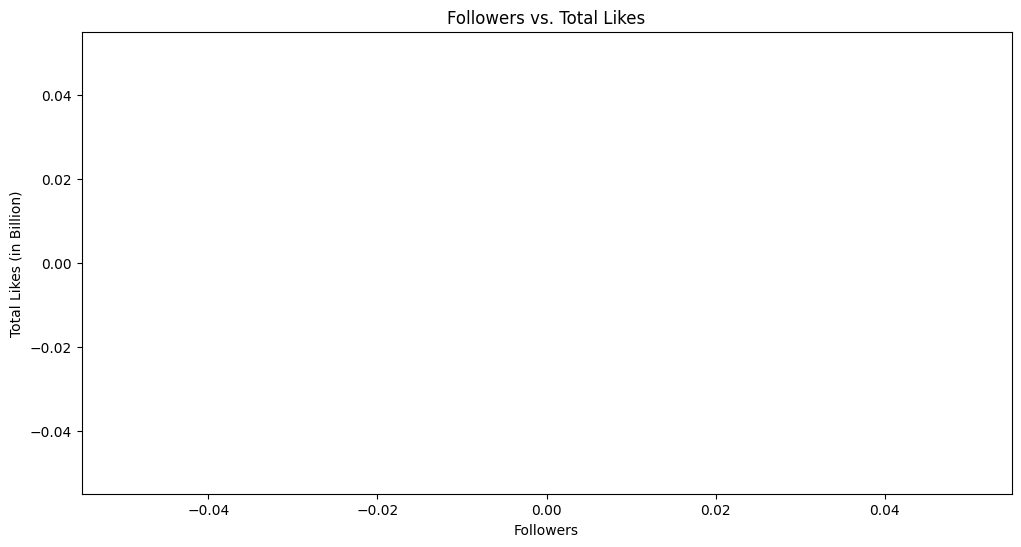

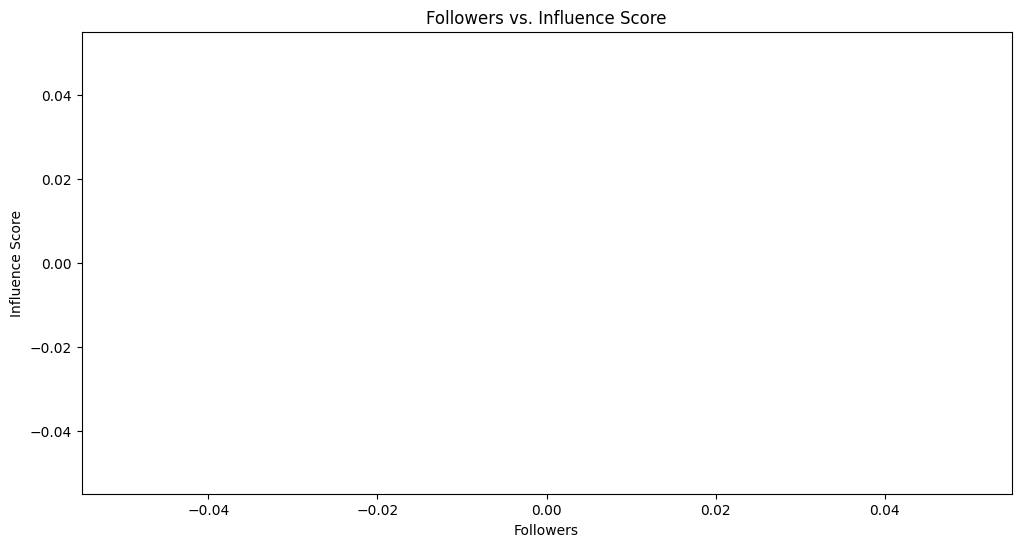

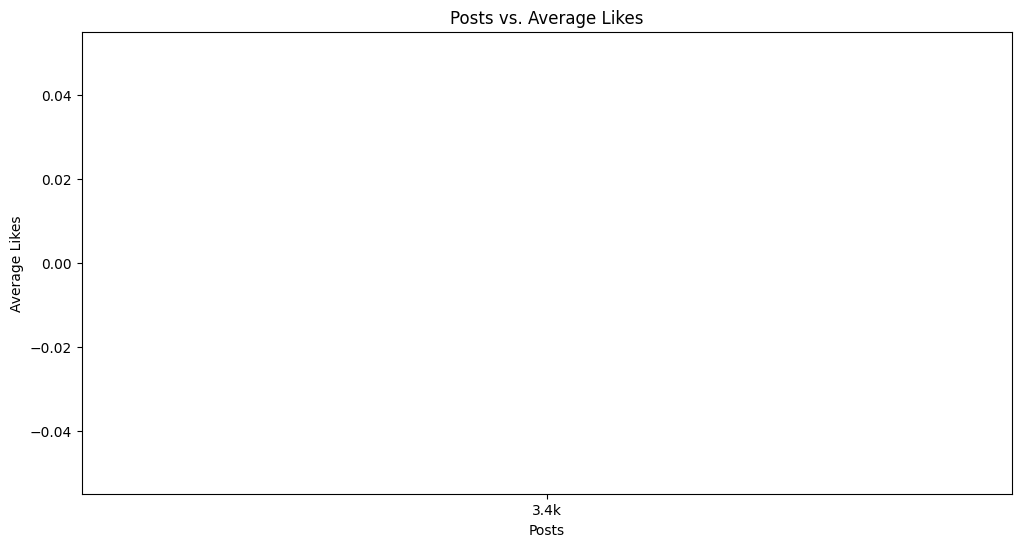

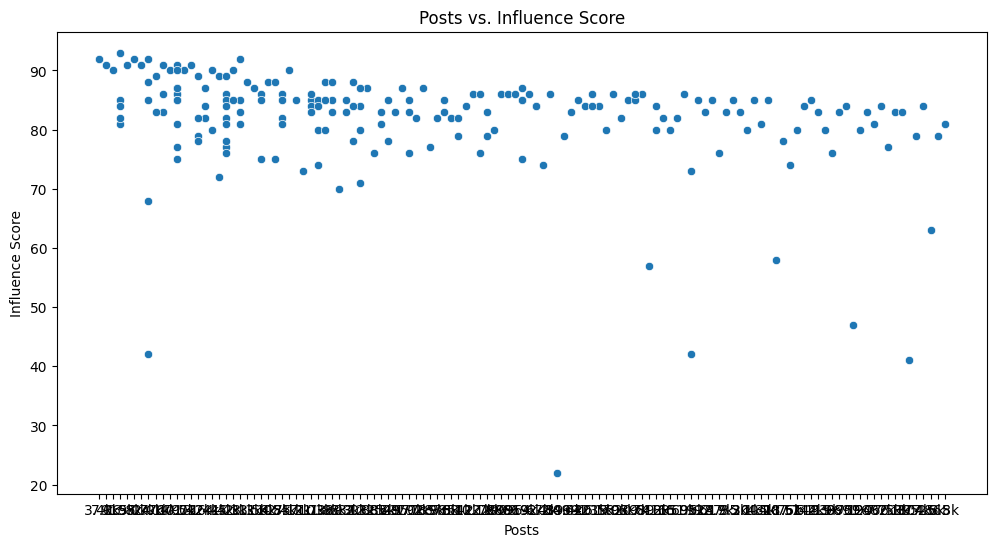

In [69]:
# Step 6: Relationship Analysis

# Followers and Total Likes
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Followers', y='Total Likes', data=df)
plt.title('Followers vs. Total Likes')
plt.xlabel('Followers')
plt.ylabel('Total Likes (in Billion)')
plt.show()

# Followers and Influence Score
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Followers', y='Influence Score', data=df)
plt.title('Followers vs. Influence Score')
plt.xlabel('Followers')
plt.ylabel('Influence Score')
plt.show()

# Posts and Average Likes
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Posts', y='Avg. Likes', data=df)
plt.title('Posts vs. Average Likes')
plt.xlabel('Posts')
plt.ylabel('Average Likes')
plt.show()

# Posts and Influence Score
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Posts', y='Influence Score', data=df)
plt.title('Posts vs. Influence Score')
plt.xlabel('Posts')
plt.ylabel('Influence Score')
plt.show()